<a href="https://colab.research.google.com/github/GouthamKumar-R/Time-series/blob/main/HHI_Fb_prophet_AIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import fbprophet
from fbprophet import Prophet

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving HHI-test.xlsx to HHI-test.xlsx
Saving HHI-train.xlsx to HHI-train.xlsx


In [3]:
import io

train_df = pd.read_excel(io.BytesIO(uploaded['HHI-train.xlsx']))
test_df = pd.read_excel(io.BytesIO(uploaded['HHI-test.xlsx']))

In [4]:
df = train_df

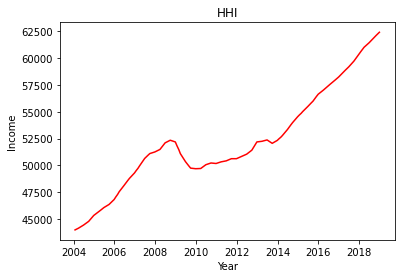

In [5]:
#Plotting
plt.plot(df["Metric"], df["Median Household Income"],'r')
plt.title("HHI")
plt.xlabel("Year")
plt.ylabel("Income")
plt.show();


In [6]:
df.dtypes

Metric                     datetime64[ns]
Median Household Income           float64
dtype: object

In [7]:
#change datetype
df["Metric"] = pd.to_datetime(df["Metric"])
df.head()

,Metric,Median Household Income
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000


In [8]:
df.set_index("Metric")

,Median Household Income
Metric,
2004-01-28,43996.755165
2004-02-28,44072.814835
2004-03-28,44154.120000
2004-04-28,44250.420000
2004-05-28,44349.930000
...,...
2018-08-31,61761.472609
2018-09-30,61927.190000
2018-10-31,62084.740761


In [9]:
df.dtypes

Metric                     datetime64[ns]
Median Household Income           float64
dtype: object

In [10]:
#library
from statsmodels.tsa.stattools import adfuller
#passing stationary TS
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df["Median Household Income"])
print("1. ADF: {0};\n2. p-value: {1};".format(adf,pvalue))
print("3. Critical values:\n",critical_values)

1. ADF: 0.29524017582572754;
2. p-value: 0.9771250515804452;
3. Critical values:
 {'1%': -3.469648263987657, '5%': -2.878798906308495, '10%': -2.5759713094779593}


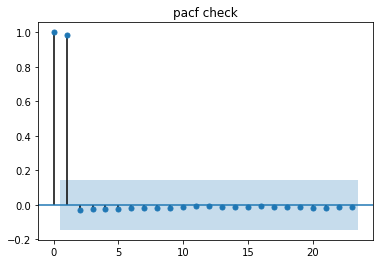

In [11]:
#library
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

fig = sm.tsa.graphics.plot_pacf(df["Median Household Income"], alpha=0.05, title = 'pacf check')

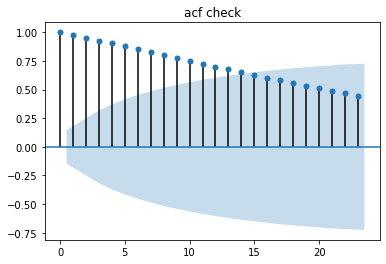

In [12]:
fig = sm.tsa.graphics.plot_acf(df["Median Household Income"], alpha=0.05, title = 'acf check')

In [13]:
df = train_df

In [14]:
#change datetype
df["Metric"] = pd.to_datetime(df["Metric"])
df.head()

,Metric,Median Household Income
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000


In [15]:
df = df.rename(columns={"Metric":"ds", "Median Household Income":"y"})
df.head()

,ds,y
0,2004-01-28,43996.755165
1,2004-02-28,44072.814835
2,2004-03-28,44154.120000
3,2004-04-28,44250.420000
4,2004-05-28,44349.930000


In [16]:
#model
from fbprophet import Prophet
model = Prophet()

In [17]:
#train data till Jun 2017
#valdiation data from july 2017
train_data = df[:162]
valdiation_data = df[162:]

train_data.tail()

,ds,y
157,2017-02-28,58547.034889
158,2017-03-31,58714.180000
159,2017-04-30,58865.238242
160,2017-05-31,59021.331758
161,2017-06-30,59172.390000


In [18]:
# let's fit our model
model.fit(train_data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
future_df = model.make_future_dataframe(periods=18, freq="M")
future_df

,ds
0,2004-01-28
1,2004-02-28
2,2004-03-28
3,2004-04-28
4,2004-05-28
...,...
175,2018-08-31
176,2018-09-30
177,2018-10-31
178,2018-11-30


In [20]:
valdiation_data

,ds,y
162,2017-07-31,59351.930543
163,2017-08-31,59531.471087
164,2017-09-30,59705.220000
165,2017-10-31,59930.687717
166,2017-11-30,60148.882283
167,2017-12-31,60374.350000
168,2018-01-31,60587.712667
169,2018-02-28,60780.427333
170,2018-03-31,60993.790000
171,2018-04-30,61133.965824


In [21]:
#Let's forecast
forecast_df = model.predict(future_df)
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-01-28,43974.459177,43885.150437,44047.583318,43974.459177,43974.459177,-8.227155,-8.227155,-8.227155,-8.227155,-8.227155,-8.227155,0.0,0.0,0.0,43966.232022
1,2004-02-28,44072.397337,43980.493598,44141.673293,44072.397337,44072.397337,-10.839719,-10.839719,-10.839719,-10.839719,-10.839719,-10.839719,0.0,0.0,0.0,44061.557618
2,2004-03-28,44164.016907,44063.069939,44218.122966,44164.016907,44164.016907,-26.523005,-26.523005,-26.523005,-26.523005,-26.523005,-26.523005,0.0,0.0,0.0,44137.493902
3,2004-04-28,44261.955067,44173.903208,44330.516108,44261.955067,44261.955067,-13.440426,-13.440426,-13.440426,-13.440426,-13.440426,-13.440426,0.0,0.0,0.0,44248.514641
4,2004-05-28,44356.733932,44272.179657,44439.343339,44356.733932,44356.733932,-0.017248,-0.017248,-0.017248,-0.017248,-0.017248,-0.017248,0.0,0.0,0.0,44356.716685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2018-08-31,61422.404313,59988.141286,62637.837035,59956.640463,62625.237812,16.758111,16.758111,16.758111,16.758111,16.758111,16.758111,0.0,0.0,0.0,61439.162424
176,2018-09-30,61576.030565,59959.842211,62885.360537,59990.160921,62891.916640,-35.677875,-35.677875,-35.677875,-35.677875,-35.677875,-35.677875,0.0,0.0,0.0,61540.352690
177,2018-10-31,61734.777692,59954.513879,63172.105365,59990.355133,63229.044370,-23.315583,-23.315583,-23.315583,-23.315583,-23.315583,-23.315583,0.0,0.0,0.0,61711.462109
178,2018-11-30,61888.403944,59960.561069,63563.343753,59958.165650,63567.350144,-7.491724,-7.491724,-7.491724,-7.491724,-7.491724,-7.491724,0.0,0.0,0.0,61880.912220


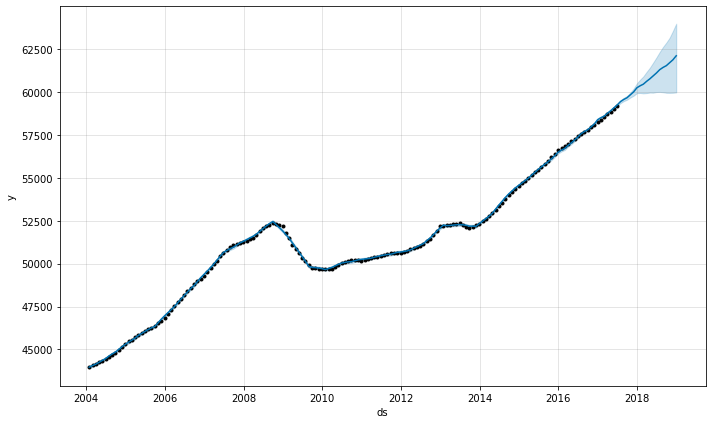

In [22]:
#plotting
model.plot(forecast_df);

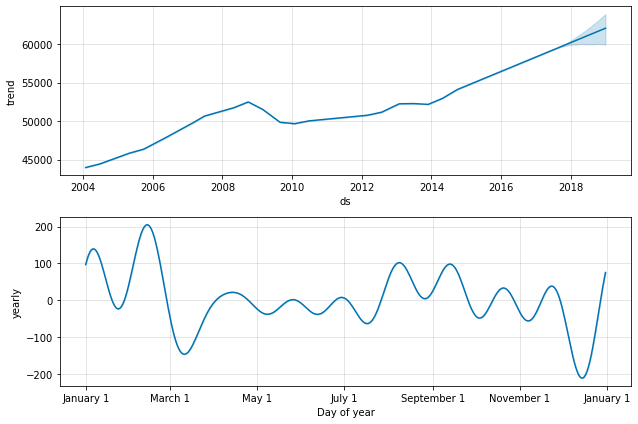

In [23]:
model.plot_components(forecast_df);

In [30]:
yhat_forecast = forecast_df["yhat"][162:]
yhat_forecast

162    59442.342707
163    59571.498578
164    59669.706146
165    59840.391934
166    60008.274050
167    60253.139855
168    60372.076682
169    60458.932679
170    60627.261205
171    60773.256651
172    60946.181906
173    61112.308574
174    61308.662326
175    61439.162424
176    61540.352690
177    61711.462109
178    61880.912220
179    62117.533517
Name: yhat, dtype: float64

In [33]:
yactual = valdiation_data["y"]
yactual

162    59351.930543
163    59531.471087
164    59705.220000
165    59930.687717
166    60148.882283
167    60374.350000
168    60587.712667
169    60780.427333
170    60993.790000
171    61133.965824
172    61278.814176
173    61418.990000
174    61590.231304
175    61761.472609
176    61927.190000
177    62084.740761
178    62237.209239
179    62394.760000
Name: y, dtype: float64

In [37]:
#RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(yactual, yhat_forecast, squared=False)
rmse

273.7203219821144

In [38]:
#R2
from sklearn.metrics import r2_score 

r2 = r2_score(yactual, yhat_forecast)
r2

0.9141325162865233

# Double Expoential Smoothing

In [40]:
#library
from statsmodels.tsa.api import Holt

train_ds = train_data['y']
des = Holt(train_ds).fit(optimized=True)
des_preds = des.forecast(len(valdiation_data))

des_preds

162    59323.727483
163    59474.992859
164    59626.258235
165    59777.523612
166    59928.788988
167    60080.054364
168    60231.319741
169    60382.585117
170    60533.850493
171    60685.115870
172    60836.381246
173    60987.646622
174    61138.911999
175    61290.177375
176    61441.442751
177    61592.708128
178    61743.973504
179    61895.238880
dtype: float64

In [41]:
rmse_des = mean_squared_error(yactual, des_preds, squared=False)
rmse_des

383.3693480472215

In [42]:
r2_des = r2_score(yactual, des_preds)
r2_des

0.8315583741888694

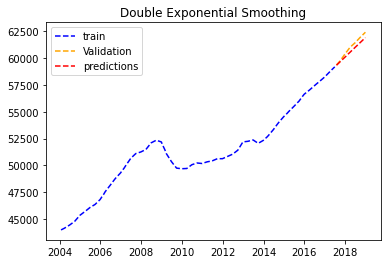

In [47]:
#plotting
plt.plot(train_data['ds'],train_data['y'] , 'b--', label="train")
plt.plot(valdiation_data['ds'], valdiation_data['y'], color='orange', linestyle="--", label="Validation")
plt.plot(valdiation_data['ds'], des_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing");